# Machine Learning

En este apartado veremos algun ejemplo de uso de Python en Machine Learning. No profundizaremos, hay muchísimo, pero si se puede hacer alguna cosa básica con pocos comandos muy interesantes.

## Machine Learning Algorithms

![ml-algorithms.jpg](./images/ml-algorithms.jpg)

## Supervised vs Unsupervised

![ml-supervised-vs-unsupervised.png](./images/ml-supervised-vs-unsupervised.png)

### Supervised Learning
-Learn the relationship between some input variables (INPUT, FEATURES, X) and outgoing ones (OUTPUT, TARGET, Y)

-From some labeled examples (we know the correct input and output), the algorithm is able to predict the value of the output for new cases not used in the learning or training process.

### Unsupervised Learning
-The algorithm extracts knowledge from the input data without the necessity of telling it what to learn

-Find regularities in input data by discovering patterns

-There is not a target

### Librería para ML en Python
https://scikit-learn.org/stable/index.html
![scikit-learn.png](./images/scikit-learn.png)


## Linear Regression (Supervised)
Recordemos que se trata de ajustar los datos a una línea de la forma $$y=mx+b$$

In [1]:
# importemos el dataset y miremos los datos
import matplotlib.pyplot as plt 
import pandas as pd  
from sklearn.linear_model import LinearRegression

data = pd.read_excel('./datasets/datasetalquilereschamberi.xlsx')
data = data.dropna() #quitar las filas en las que no tenemos valores
display(data.head())
display(data.describe())

,Precio,Superficie,Habitaciones,Altura,Exterior,Distanciasol
0,1950,153.0,4,2,1,3.6
1,1250,60.0,1,6,1,2.3
2,950,34.0,1,4,1,2.7
3,2350,126.0,3,5,1,2.3
4,630,26.0,1,6,1,1.9


,Precio,Superficie,Habitaciones,Altura,Exterior,Distanciasol
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,1227.077922,67.071429,1.642857,2.987013,0.571429,2.712987
std,452.266154,32.557261,0.853126,1.919923,0.496486,0.732147
min,530.000000,22.000000,0.000000,-1.000000,0.000000,1.400000
25%,1000.000000,45.000000,1.000000,2.000000,0.000000,2.200000
50%,1200.000000,63.500000,2.000000,3.000000,1.000000,2.500000
75%,1300.000000,76.000000,2.000000,4.000000,1.000000,3.200000
max,3500.000000,233.000000,5.000000,7.000000,1.000000,5.300000


Intercept: 
 [437.06899346]
Coefficients: 
 [[11.77862087]]
R2 score: 
 0.7189462765936531
mean absolute error: 
 168.9745665599612
Predicted values: 
 [[1026.00003716]]


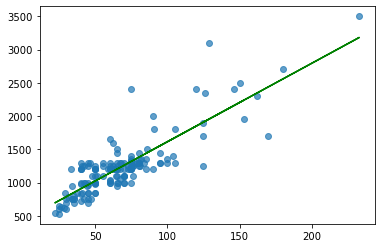

In [2]:
# Pasamos los valores a estructuras 2D X=(n_samples, n_features), Y=(n_samples, n_targets)
X = data[['Superficie']].values.reshape(-1, 1) 
Y = data['Precio'].values.reshape(-1, 1)  

# ajustamos el modelo
model = LinearRegression() 
model.fit(X, Y) 
Y_pred = model.predict(X)  

# imprimimos los resultados del modelo
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)
print('R2 score: \n', model.score(X,Y))
print('mean absolute error: \n',str(np.mean(abs(Y_pred - Y))))

# podemos hacer predicción con sklearn
nueva_superficie = 50
print ('Predicted values: \n', model.predict([[nueva_superficie]]))

# Lo pintamos
plt.scatter(X, Y, alpha=0.7)
plt.plot(X, Y_pred, color='green')
plt.show()

### Training y Test

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, random_state=0)

#Tenemos la entrada del entrenamient en X_train y l asalida en y_train. Y lo mismo para test

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (115, 1)
y_train shape: (115, 1)


In [4]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (39, 1)
y_test shape: (39, 1)


### Entrenamiento y predicción

In [5]:
# Entrenamiento
model.fit(X_train, y_train) 
print('R2 score - train: \n', model.score(X_train,y_train))

# podemos hacer predicción con sklearn
nueva_superficie = 50
print ('Predicted values: \n', model.predict([[nueva_superficie]]))


R2 score - train: 
 0.6677336418821564
Predicted values: 
 [[1032.75227014]]


### Evaluación modelo

In [6]:
# Hacemos una predicción de todos los valores y compramos con los reales
y_pred = model.predict(X_test)

print('mean absolute error: \n',str(np.mean(abs(y_pred - y_test))))

mean absolute error: 
 187.4550125674721


### Predicción con más columnas

In [7]:
# Pasamos los valores a estructuras 2D X=(n_samples, n_features), Y=(n_samples, n_targets)
X = data[['Superficie','Habitaciones','Altura','Exterior','Distanciasol']]
Y = data['Precio'].values.reshape(-1, 1)  

# separamos los datos
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, random_state=0)

# ajustamos el modelo
model = LinearRegression() 
model.fit(X_train, y_train) 
Y_pred = model.predict(X_test)  

# imprimimos los resultados del modelo
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)
print('R2 score: \n', model.score(X_train,y_train))
print('mean absolute error: \n',str(np.mean(abs(Y_pred - y_test))))

# podemos hacer predicción con sklearn
Superficie = 50
Habitaciones = 4
Altura = 3
Exterior = 1
Distanciasol = 2
print ('Predicted values: \n', model.predict([[Superficie,Habitaciones,Altura,Exterior,Distanciasol]]))

Intercept: 
 [423.02006259]
Coefficients: 
 [[  9.68434161  49.44352796  26.2146344   66.17337608 -18.65975457]]
R2 score: 
 0.695231764370401
mean absolute error: 
 175.56868381013402
Predicted values: 
 [[1212.50902499]]


## Multi-layer Perceptron regressor (Supervised)
![multi_layer_perceptron.jpg](./images/multi_layer_perceptron.jpg)

In [8]:
import sklearn as sk
from sklearn.neural_network import MLPRegressor

NN = MLPRegressor(random_state=1, max_iter=1000)
NN.fit(X_train, y_train)
Y_pred = NN.predict(X_test)

# imprimimos los resultados del modelo
print('R2 score: \n', NN.score(X_train,y_train))
print('mean absolute error: \n',str(np.mean(abs(Y_pred - y_test))))

# nunca subestimen el poder una regresión lineal, y "fancy names" no siempre son sinónimo de calidad...

C:\Users\ESY4259360G\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 score: 
 0.5715939792252358
mean absolute error: 
 532.2999477966328


C:\Users\ESY4259360G\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Clustering (Unsupervised)
Existen diferentes algoritmos de agrupación, en este ejemplo se uno de los más populares: k-means
![kmean-clustering.png](./images/kmean-clustering.png)

,Precio,Superficie,Habitaciones,Altura,Exterior,Distanciasol
0,1950,153.0,4,2,1,3.6
1,1250,60.0,1,6,1,2.3
2,950,34.0,1,4,1,2.7
3,2350,126.0,3,5,1,2.3
4,630,26.0,1,6,1,1.9
...,...,...,...,...,...,...
155,1350,82.0,3,4,1,2.4
156,1400,75.0,2,2,0,2.2
157,1300,100.0,2,0,0,2.4
158,1200,40.0,0,2,1,1.8


,Precio,Superficie,Habitaciones,Altura,Exterior,Distanciasol,cluster
0,1950,153.0,4,2,1,3.6,3
1,1250,60.0,1,6,1,2.3,1
2,950,34.0,1,4,1,2.7,2
3,2350,126.0,3,5,1,2.3,3
4,630,26.0,1,6,1,1.9,2
...,...,...,...,...,...,...,...
155,1350,82.0,3,4,1,2.4,1
156,1400,75.0,2,2,0,2.2,1
157,1300,100.0,2,0,0,2.4,1
158,1200,40.0,0,2,1,1.8,2


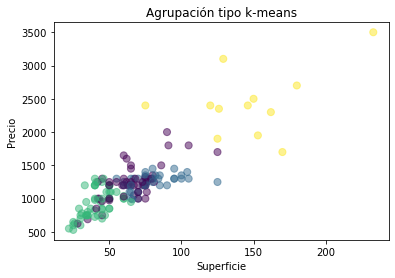

In [9]:
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler

# seleccionamos las columnas para la clusterización
#data_clust = data[['Precio','Superficie']]
data_clust = data[['Precio','Superficie','Distanciasol']]

# K-means clustering
# parameter definition
num_clusters = 4
kmeans = cluster.KMeans(n_clusters=num_clusters, init='k-means++', max_iter=600)

# scaling the input data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_clust)

# clustering and results
kmeans.fit(data_scaled)
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)
labels = kmeans.labels_

# including cluster information in a dataset
data_kmeans = data.copy()
data_kmeans['cluster'] = labels
data_kmeans['cluster'] = data_kmeans['cluster'].astype('category')
display(data)
display(data_kmeans)

# matplotlib scatter plot
plt.style.use('seaborn-dark-palette')
plt.scatter(data_kmeans['Superficie'], data_kmeans['Precio'], c= data_kmeans['cluster'], s=50, alpha=0.5)
plt.xlabel('Superficie')
plt.ylabel('Precio')
plt.title('Agrupación tipo k-means')

# export results to excel
data_kmeans.to_excel('datasetalquilereschamberi-kmeans.xlsx')